# Exercise sheet 13

---

## Exercise 1 - Exoplanets, with errors

For this exercise, you will need to load the dataset exoplanets-errors from the course’s github repository: https://github.com/bodemory/ASMP. This is the same dataset as the one you used in the previous sheet except that this dataset includes measurement errors. Revisit the multi-level exoplanets exercise from Sheet 12 by including measurement errors. How do the results change compared to the dataset without uncertainties? As in the course, start by including error bars on the outcome first and then on the predictor(s). Then repeat the fit two times, first by doubling the error bar size on the outcomes/predictors, second by halving them. Compare the inferences of these three models (original error bars, double & half).

---

In [1]:
library(rethinking)
exoplanets <- read.csv(file = "D:\\Users\\Immanuel\\Documents\\_Programming\\my_r\\advanced_statistics\\exercise_sheet_12\\ASMP\\exoplanets_errors.csv", header = TRUE, sep = ",", skip = 65)
exoplanets

Lade nötiges Paket: rstan

Lade nötiges Paket: StanHeaders


rstan version 2.26.16 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file

Lade nötiges Paket: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: D:/Users/Immanuel/Documents/.cmdstan/cmdstan-2.31.0

- CmdStan version: 2.31.0


A newer version of CmdStan is available. See ?install_cmdstan() to install it.
To disable this check set option or environment variable CMDSTANR_NO_VER_CHECK=TRUE.

Lade nötiges Paket: parallel

rethinking (Version 2.31)

pl_name,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,⋯,st_tefferr2,st_tefflim,st_mass,st_masserr1,st_masserr2,st_masslim,st_rad,st_raderr1,st_raderr2,st_radlim
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
WTS-1 b,Transit,1,3.352057,1.3e-05,-1.5e-05,0,0.04700,0.00100,-0.00100,⋯,-200,0,1.20,0.10,-0.10,0,1.15,0.10,-0.12,0
WASP-89 b,Transit,1,3.356423,2.5e-06,-2.5e-06,0,0.04270,0.00120,-0.00120,⋯,-90,0,0.92,0.08,-0.08,0,0.88,0.03,-0.03,0
WASP-81 b,Transit,1,2.716476,2.3e-06,-2.3e-06,0,0.03908,0.00070,-0.00072,⋯,-120,0,1.08,0.06,-0.06,0,1.28,0.04,-0.04,0
WASP-80 b,Transit,1,3.067852,8.3e-07,-7.9e-07,0,0.03440,0.00100,-0.00110,⋯,-94,0,0.58,0.05,-0.05,0,0.59,0.02,-0.02,0
WASP-59 b,Transit,1,7.919585,1.0e-05,-1.0e-05,0,0.06970,0.00110,-0.00110,⋯,-150,0,0.72,0.04,-0.04,0,0.61,0.04,-0.04,0
WASP-53 b,Transit,2,3.309844,2.0e-06,-2.0e-06,0,0.04101,0.00083,-0.00091,⋯,-60,0,0.84,0.05,-0.05,0,0.80,0.02,-0.02,0
WASP-5 b,Transit,1,1.628428,2.2e-06,-4.9e-06,0,0.02670,0.00120,-0.00080,⋯,-100,0,0.96,0.13,-0.09,0,1.03,0.06,-0.07,0
WASP-19 b,Transit,1,0.788839,4.0e-08,-4.0e-08,0,0.01634,0.00024,-0.00024,⋯,-71,0,0.90,0.04,-0.04,0,1.00,0.02,-0.02,0
WASP-162 b,Transit,1,9.624680,1.0e-05,-1.0e-05,0,0.08710,0.00130,-0.00130,⋯,-100,0,0.95,0.04,-0.04,0,1.11,0.05,-0.05,0


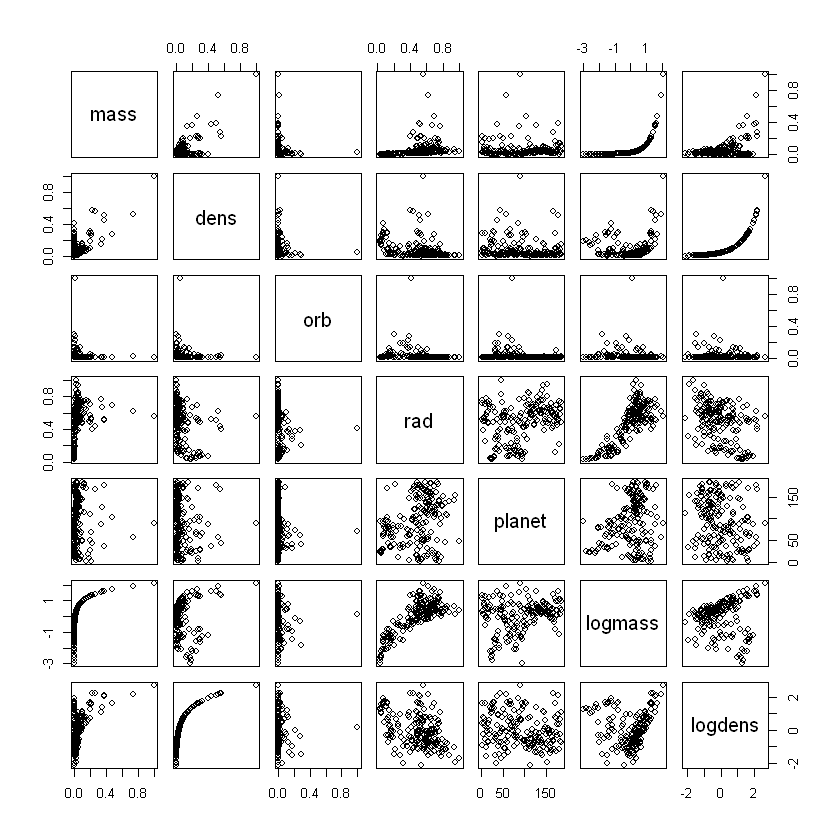

In [55]:
d <- data.frame(list(mass = exoplanets$pl_bmassj))

d$mass <- exoplanets$pl_bmassj / max(exoplanets$pl_bmassj)
d$dens <- exoplanets$pl_dens / max(exoplanets$pl_dens)
d$orb <- exoplanets$pl_orbper / max(exoplanets$pl_orbper)
d$rad <- exoplanets$pl_radj / max(exoplanets$pl_radj)

d$planet <- c(1:nrow(d))

d$logmass <- scale(log(exoplanets$pl_bmassj))
d$logdens <- scale(log(exoplanets$pl_dens))

pairs(d)

In [8]:
#d$masserr <- exoplanets$pl_bmassjerr1 / max(exoplanets$pl_bmassj)
#d$denserr <- exoplanets$pl_denserr1 / max(exoplanets$pl_dens)
#d$orberr <- exoplanets$pl_orbpererr1 / max(exoplanets$pl_orbper)
#d$raderr <- exoplanets$pl_radjerr1 / max(exoplanets$pl_radj)

In [60]:
# Model considering mass influencing density
model <- ulam(
	alist(
		logdens ~ dnorm(mu, sigma),
		mu <- if_else(logmass <= cutoff, 1, 0) *
		(off_lower + slope_mass_lower * logmass) + #off_planet[planet] +
		if_else(logmass > cutoff, 1, 0) *
		(off_upper + slope_mass_upper * logmass),
		cutoff ~ dunif(0, 10),
		c(off_lower, off_upper) ~ dnorm(0, 10),
		#off_planet[planet] ~ dnorm(a_planet, sigma_planet),
		#a_planet ~ dnorm(0, 10),
		#sigma_planet ~ dcauchy(0, 10),
		c(slope_mass_lower, slope_mass_upper) ~ dnorm(0, 10),
		sigma ~ dunif(0, 10)
	),
	data = d, iter = 4000, chains = 12, cores = 12
)

Warning in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmp2X5TF5/model-67a064421f3.stan', line 27, column 16: The
    function `if_else` is deprecated and will be removed in Stan 2.32.0. Use
    the conditional operator (x ? y : z) instead; this can be automatically
    changed using the canonicalize flag for stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmp2X5TF5/model-67a064421f3.stan', line 27, column 100: The
    function `if_else` is deprecated and will be removed in Stan 2.32.0. Use
    the conditional operator (x ? y : z) instead; this can be automatically
    changed using the canonicalize flag for stanc


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/od

Running MCMC with 12 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmp2X5TF5/model-67a064421f3.stan', line 29, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmp2X5TF5/model-67a064421f3.stan', line 29, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 6 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmp2X5TF5/model-67a064421f3.stan', line 29, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 8 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 9 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 9 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 9 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmp2X5TF5/model-67a064421f3.stan', line 29, column 4 to column 35)

Chain 9 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 9 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 9 



Chain 10 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 11 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 12 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 9 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 7 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 4 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 12 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 5 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 6 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 8 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 10 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 11 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 9 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 7 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 5 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 12 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 6 Itera

See https://mc-stan.org/misc/warnings for details.




In [58]:
precis(model, depth = 2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cutoff,0.4234884,0.06198835,0.3338689,0.5538091,14.464873,1.741668
off_upper,-0.2844325,0.58958635,-1.2720474,0.9886076,6.094005,10.614658
off_lower,2.2571170,5.91911998,-10.4843055,12.1457915,6.095555,10.592637
slope_mass_upper,0.2397584,0.64972023,-0.5758023,1.7805621,6.159280,8.540491
slope_mass_lower,-2.9860349,6.48193318,-18.2907605,5.2266307,6.160513,8.520721
sigma,0.8964497,0.04081132,0.8404249,0.9657996,93.769144,1.147414


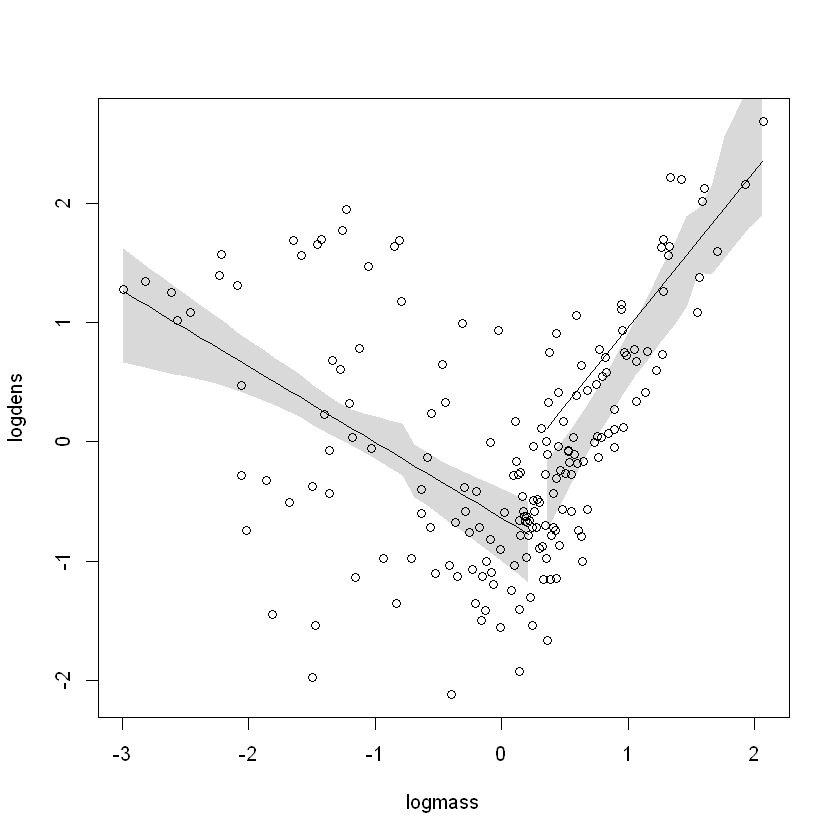

In [69]:
post <- extract.samples(model, n = 1000000)
mu_link <- function(logmass) ifelse(logmass <= mean(post$cutoff), 1, 0) *
		(post$off_lower + post$slope_mass_lower * logmass) +
		ifelse(logmass > mean(post$cutoff), 1, 0) *
		(post$off_upper + post$slope_mass_upper * logmass)

plot(logdens ~ logmass, data = d)

logmass_seq <- seq(from = min(d$logmass), to = mean(post$cutoff), by = 0.1)

mu <- sapply(logmass_seq, mu_link)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.91)

lines(logmass_seq, mu_mean)
shade(mu_HPDI, logmass_seq)

logmass_seq <- seq(from = mean(post$cutoff) + 0.05, to = max(d$logmass), by = 0.1)

mu <- sapply(logmass_seq, mu_link)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.91)

lines(logmass_seq, mu_mean)
shade(mu_HPDI, logmass_seq)